<a href="https://colab.research.google.com/github/chemaoxfz/bi23/blob/main/202201_Bi23_reaction_order_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
# Plotting modules and settings.
import matplotlib.pyplot as plt
import seaborn as sns
colors = ('#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
          '#bcbd22', '#17becf')
sns.set(style='ticks', palette=colors)

sns.set_context('talk',font_scale=2,rc={'lines.linewidth':3})

# The following is specific Jupyter notebooks
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}


## The function that computes the log derivative in general.
### You could specify \\(L\\) and \\(N\\) matrices directly, or use l_from_n function to compute \\(L\\) from \\(N\\).

In [24]:
def log_der_calc(x,l_mat,n_mat):
  #given x, L and N, return the log derivative
  t_inv = 1/(l_mat.dot(x))
  temp=l_mat*x
  upper=(temp.T*t_inv).T
  logder_inv=np.concatenate((upper,n_mat),axis=0)
  return np.linalg.inv(logder_inv)

def l_from_n(n_mat):
  #given N matrix, return L matrix. 
  #Assume species ordered so that the atomic species come first.
  r=n_mat.shape[0]
  d=n_mat.shape[1]-r
  n1_mat=n_mat[:,:d]
  n2_mat=n_mat[:,-r:]
  l2_mat=-(n1_mat.T)*(np.linalg.inv(n2_mat).T)
  l_mat=np.concatenate((np.eye(d),l2_mat),axis=1)
  return l_mat


Sampling the reaction orders of \\(C\\) in \\(t_E\\) and \\(t_S\\) in the simple binding reaction \\(E+S \rightleftharpoons C\\).

Order of the species is \\((E,S,C)\\), order of the totals is \\((t_E,t_S)\\).

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

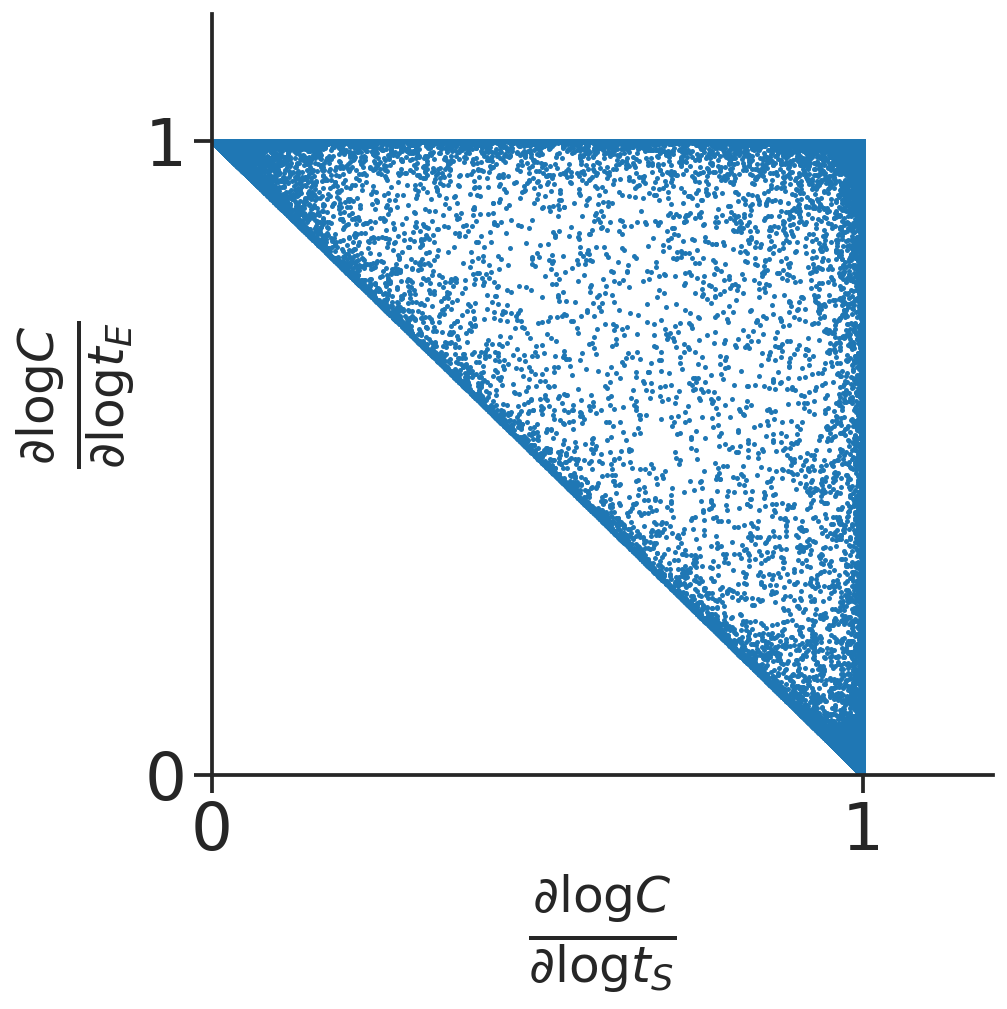

In [26]:
l_mat=np.array([[1,0,1],
                [0,1,1]])
n_mat=np.array([[-1,-1,1]])
d_dim,n_dim=l_mat.shape

n_pts=100000
x_min_log10=-6
x_max_log10=6
xx=10**(np.random.rand(n_pts,n_dim)*(x_max_log10 - x_min_log10)+x_min_log10)
logders=np.zeros([n_pts,n_dim,n_dim]) # 2nd index is species, 3rd index is total and k.

for i in range(n_pts):
  logders[i]=log_der_calc(xx[i],l_mat,n_mat)

sns.set_context('talk',font_scale=2,rc={'lines.linewidth':3})

fig, ax = plt.subplots(1, 1,figsize=(7,7))
ax.scatter(logders[:,2,1],logders[:,2,0],s=1)
ax.set_xlabel(r'$\frac{\partial \log C}{\partial \log t_S}$')
ax.set_ylabel(r'$\frac{\partial \log C}{\partial \log t_E}$')

#remove top and right borders
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#restrict number of ticks
plt.locator_params(axis='x', nbins=2)
plt.locator_params(axis='y', nbins=2)

ax.set_xlim([0,1.2])
ax.set_ylim([0,1.2])
handles, labels = ax.get_legend_handles_labels()

## Below are commands that saves and then downloads the figure from google colab
plt.savefig('C-log-der-tE-tS-sampling.pdf', bbox_inches='tight')
from google.colab import files
files.download('C-log-der-tE-tS-sampling.pdf') 

Without re-simulating, we can take the points simulated from above and plot the reaction order of \\(E\\) in \\(t_E, t_S\\).

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

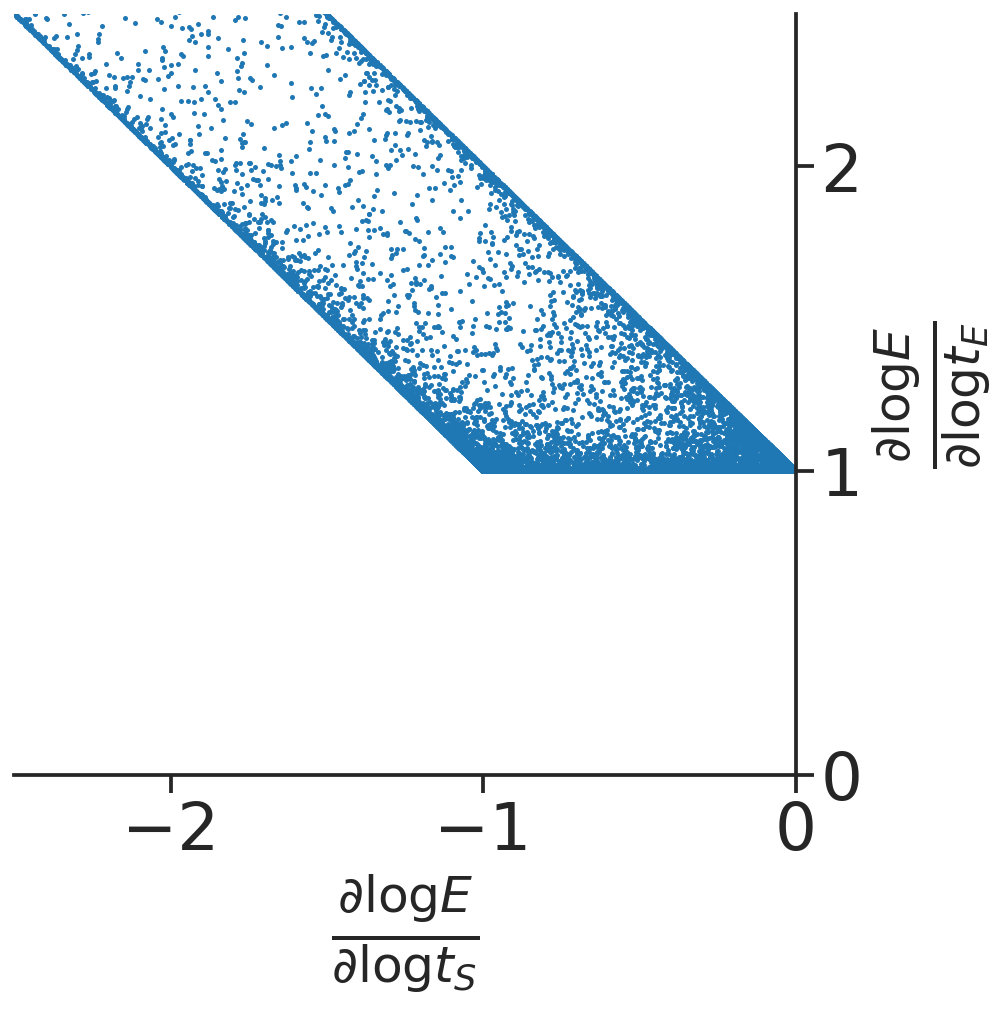

In [32]:
fig, ax = plt.subplots(1, 1,figsize=(7,7))
ax.scatter(logders[:,0,1],logders[:,0,0],s=1)
ax.set_xlabel(r'$\frac{\partial \log E}{\partial \log t_S}$')
ax.set_ylabel(r'$\frac{\partial \log E}{\partial \log t_E}$')


#remove top and right borders
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.yaxis.set_ticks_position('right')
ax.yaxis.set_label_position('right') 
ax.set_xlim([-2.5,0])
ax.set_ylim([0,2.5])
plt.locator_params(axis='x', nbins=3)
plt.locator_params(axis='y', nbins=3)

handles, labels = ax.get_legend_handles_labels()
## Below are commands that saves and then downloads the figure from google colab
plt.savefig('E-log-der-tE-tS-sampling.pdf', bbox_inches='tight')
from google.colab import files
files.download('E-log-der-tE-tS-sampling.pdf') 

Here we investigate the various cases of binding to several substrates. 
(1) simple one step binding, \\(E_0+nS \rightleftharpoons E_n\\).
This case has \\(N = \begin{bmatrix} -1 & -n & 1 \end{bmatrix}\\), \\(L = \begin{bmatrix} 1 & 0 & 1 \\ 0 & 1 & n \end{bmatrix}\\).

In [ ]:
param_n=2

l_mat=np.array([[1,0,1],
                [0,1,param_n]])
n_mat=np.array([[-1,-param_n,1]])
d_dim,n_dim=l_mat.shape

n_pts=100000
x_min_log10=-6
x_max_log10=6
xx=10**(np.random.rand(n_pts,n_dim)*(x_max_log10 - x_min_log10)+x_min_log10)
logders=np.zeros([n_pts,n_dim,n_dim])
for i in range(n_pts):
  logders[i]=log_der_calc(xx[i],l_mat,n_mat)

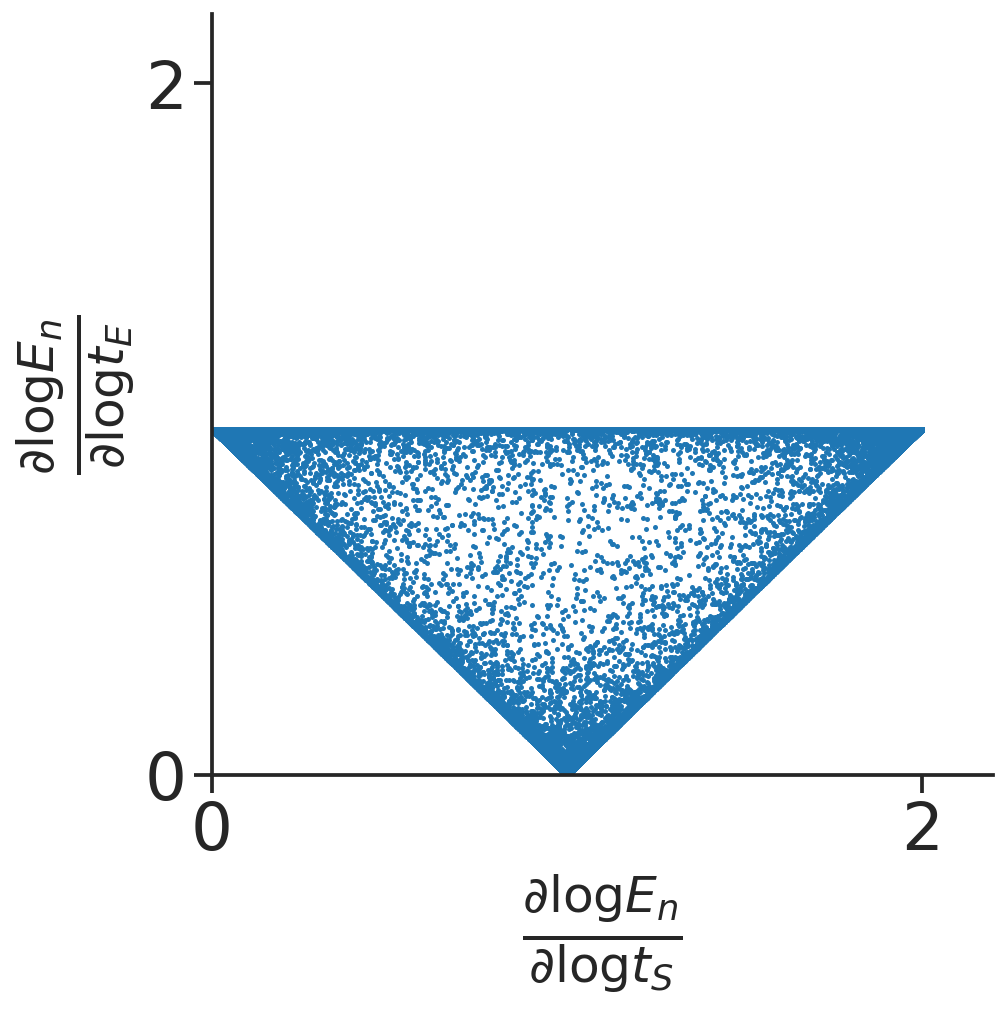

In [ ]:
sns.set_context('talk',font_scale=2,rc={'lines.linewidth':3})

fig, ax = plt.subplots(1, 1,figsize=(7,7))
ax.scatter(logders[:,2,1],logders[:,2,0],s=1)
ax.set_xlabel(r'$\frac{\partial \log E_n}{\partial \log t_S}$')
ax.set_ylabel(r'$\frac{\partial \log E_n}{\partial \log t_E}$')

#remove top and right borders
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#restrict number of ticks
plt.locator_params(axis='x', nbins=2)
plt.locator_params(axis='y', nbins=2)

ax.set_xlim([0,2.2])
ax.set_ylim([0,2.2])
handles, labels = ax.get_legend_handles_labels()
# plt.savefig('C-log-der-tE-tS-sampling.pdf', bbox_inches='tight')

Second case. (2) group binding, \\(nS \rightleftharpoons S_n\), \\(E_0+S_n \rightleftharpoons E_n\\).
Order species by \\((E_0,S,S_n,E_n)\\), order totals by \\((t_E,t_S)\\).
This case has \\(N = \begin{bmatrix} -1 & 0 & -1 & 1 \\ 0 & -n & 1 & 0 \end{bmatrix}\\), \\(L = \begin{bmatrix} 1 & 0 & 0 & 1 \\ 0 & 1 & n & n \end{bmatrix}\\).

In [ ]:
param_n=2

l_mat=np.array([[1,0,0,1],
                [0,1,param_n,param_n]])
n_mat=np.array([[-1,0,-1,1],
                [0,-param_n,1,0]])
d_dim,n_dim=l_mat.shape

n_pts=100000
x_min_log10=-6
x_max_log10=6
xx=10**(np.random.rand(n_pts,n_dim)*(x_max_log10 - x_min_log10)+x_min_log10)
logders=np.zeros([n_pts,n_dim,n_dim])
for i in range(n_pts):
  logders[i]=log_der_calc(xx[i],l_mat,n_mat)

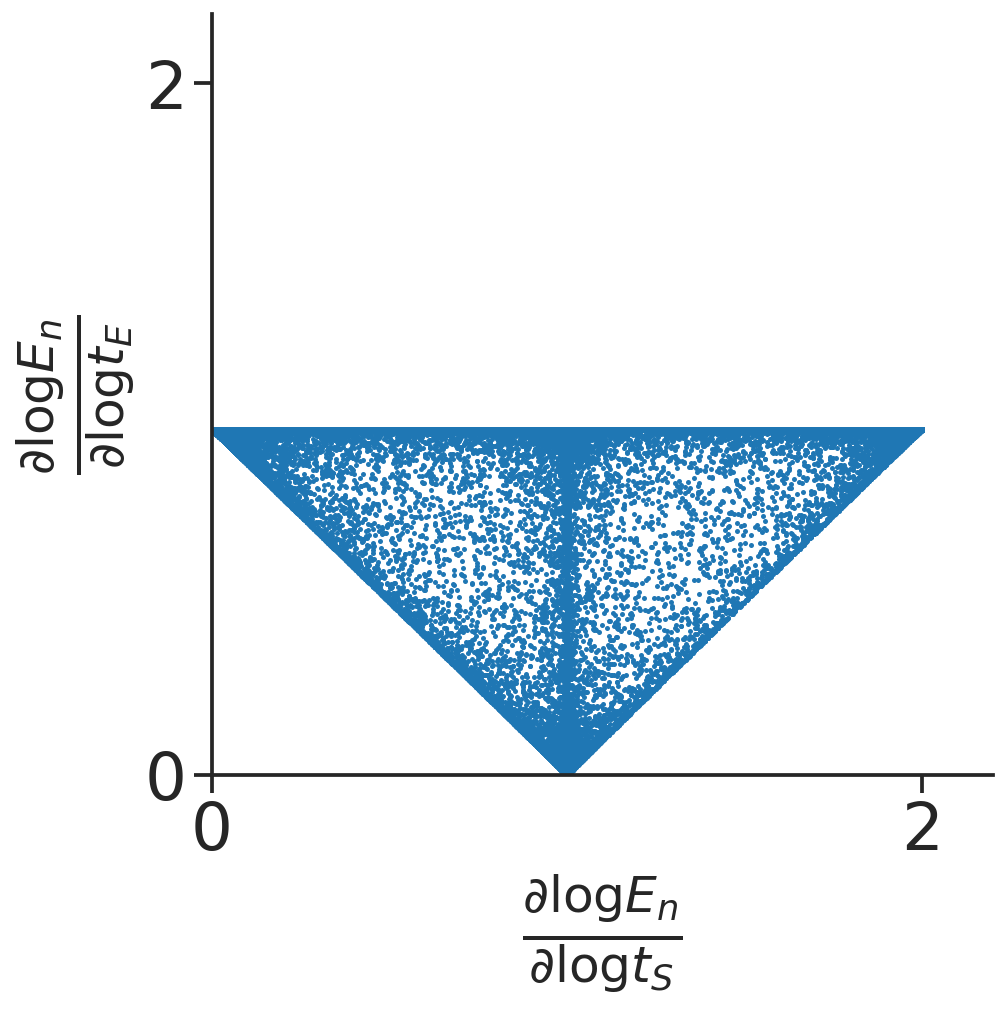

In [ ]:
sns.set_context('talk',font_scale=2,rc={'lines.linewidth':3})

fig, ax = plt.subplots(1, 1,figsize=(7,7))
ax.scatter(logders[:,3,1],logders[:,3,0],s=1)
ax.set_xlabel(r'$\frac{\partial \log E_n}{\partial \log t_S}$')
ax.set_ylabel(r'$\frac{\partial \log E_n}{\partial \log t_E}$')

#remove top and right borders
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#restrict number of ticks
plt.locator_params(axis='x', nbins=2)
plt.locator_params(axis='y', nbins=2)

ax.set_xlim([0,2.2])
ax.set_ylim([0,2.2])
handles, labels = ax.get_legend_handles_labels()
# plt.savefig('C-log-der-tE-tS-sampling.pdf', bbox_inches='tight')

Third case. (3) one-by-one binding, 
\\(E_0+S \rightleftharpoons E_1\\), ..., \\(E_{n-1} + S \rightleftharpoons E_n\\)
Order species by \\((S,E_0,E_1,\dots,E_n)\\), order totals by \\((t_S,t_E)\\).
For \(n=2\), this case has \\(N = \begin{bmatrix} -1 & -1 & 1 & 0 \\ -1 & 0 & -1 & 1  \end{bmatrix}\\), 
\\(L = \begin{bmatrix} 1 & 0 & 1 & 2 \\ 0 & 1 & 1 & 1 \end{bmatrix}\\).

In [ ]:
l_mat=np.array([[1,0,1,2],
                [0,1,1,1]])
n_mat=np.array([[-1,-1,1,0],
                [-1,0,-1,1]])
d_dim,n_dim=l_mat.shape

n_pts=100000
x_min_log10=-10
x_max_log10=0
xx=10**(np.random.rand(n_pts,n_dim)*(x_max_log10 - x_min_log10)+x_min_log10)
logders=np.zeros([n_pts,n_dim,n_dim])
for i in range(n_pts):
  logders[i]=log_der_calc(xx[i],l_mat,n_mat)

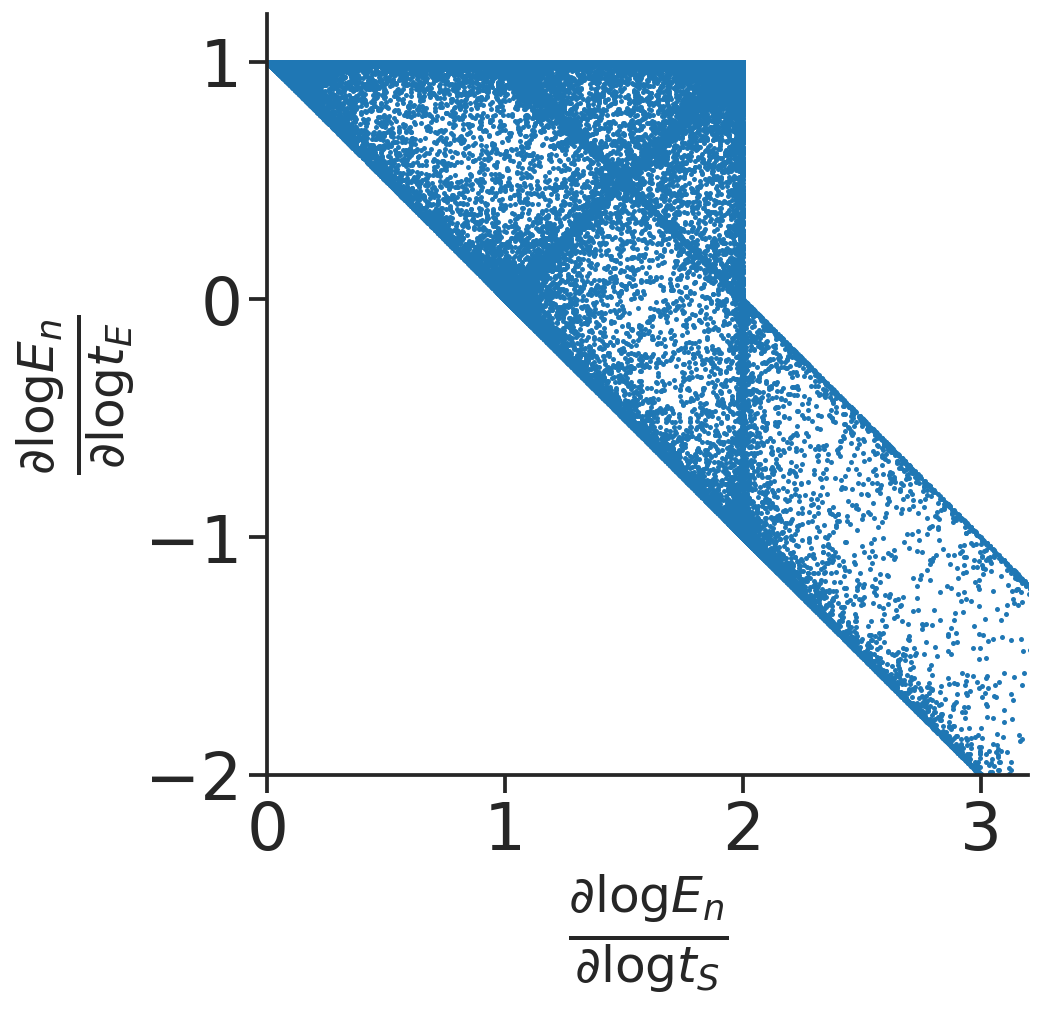

In [ ]:
sns.set_context('talk',font_scale=2,rc={'lines.linewidth':3})

fig, ax = plt.subplots(1, 1,figsize=(7,7))
ax.set_aspect('equal')
ax.scatter(logders[:,3,0],logders[:,3,1],s=1)
ax.set_xlabel(r'$\frac{\partial \log E_n}{\partial \log t_S}$')
ax.set_ylabel(r'$\frac{\partial \log E_n}{\partial \log t_E}$')

xmin=0; xmax=3.2; ax.set_xlim([xmin,xmax])
ymin=-2; ymax=1.2; ax.set_ylim([ymin,ymax])

#remove top and right borders
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#restrict number of ticks
plt.locator_params(axis='x', nbins=int(xmax-xmin)+1)
plt.locator_params(axis='y', nbins=int(ymax-ymin)+1)

handles, labels = ax.get_legend_handles_labels()
# plt.savefig('C-log-der-tE-tS-sampling.pdf', bbox_inches='tight')

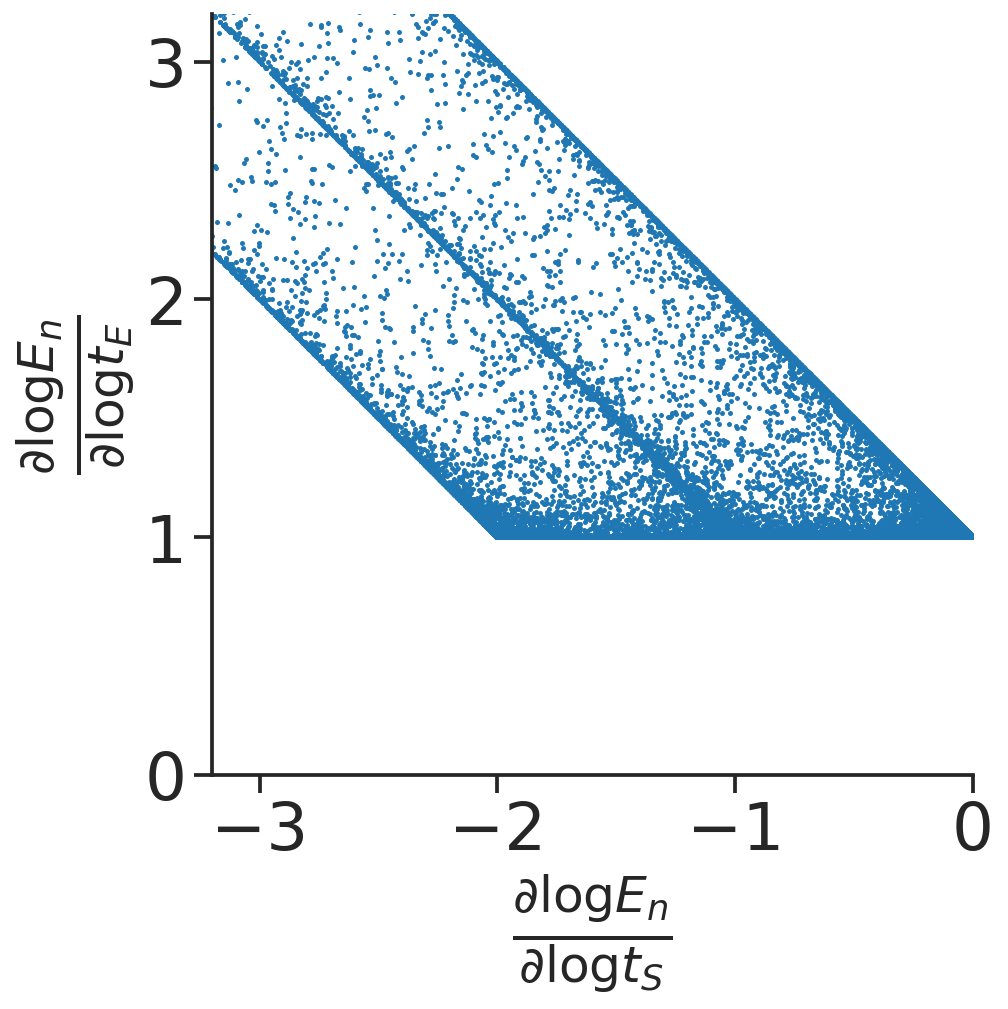

In [ ]:
sns.set_context('talk',font_scale=2,rc={'lines.linewidth':3})

fig, ax = plt.subplots(1, 1,figsize=(7,7))
ax.set_aspect('equal')
ax.scatter(logders[:,1,0],logders[:,1,1],s=1)
ax.set_xlabel(r'$\frac{\partial \log E_n}{\partial \log t_S}$')
ax.set_ylabel(r'$\frac{\partial \log E_n}{\partial \log t_E}$')

xmin=-3.2; xmax=0; ax.set_xlim([xmin,xmax])
ymin=0; ymax=3.2; ax.set_ylim([ymin,ymax])

#remove top and right borders
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#restrict number of ticks
plt.locator_params(axis='x', nbins=int(xmax-xmin)+1)
plt.locator_params(axis='y', nbins=int(ymax-ymin)+1)

handles, labels = ax.get_legend_handles_labels()
# plt.savefig('C-log-der-tE-tS-sampling.pdf', bbox_inches='tight')

Third case. (3) one-by-one binding, 
\\(E_0+S \rightleftharpoons E_1\\), ..., \\(E_{n-1} + S \rightleftharpoons E_n\\)
Order species by \\((S,E_0,E_1,\dots,E_n)\\), order totals by \\((t_S,t_E)\\).
For \(n=3\), this case has \\(N = \begin{bmatrix} -1 & -1 & 1 & 0 & 0 \\ -1 & 0 & -1 & 1 & 0 \\ -1 & 0 & 0 & -1 & 1 \end{bmatrix}\\), 
\\(L = \begin{bmatrix} 1 & 0 & 1 & 2 & 3 \\ 0 & 1 & 1 & 1 & 1 \end{bmatrix}\\).

In [ ]:
l_mat=np.array([[1,0,1,2,3],
                [0,1,1,1,1]])
n_mat=np.array([[-1,-1,1,0,0],
                [-1,0,-1,1,0],
                [-1,0,0,-1,1]])
d_dim,n_dim=l_mat.shape

n_pts=100000
x_min_log10=-6
x_max_log10=6
xx=10**(np.random.rand(n_pts,n_dim)*(x_max_log10 - x_min_log10)+x_min_log10)
logders=np.zeros([n_pts,n_dim,n_dim])
for i in range(n_pts):
  logders[i]=log_der_calc(xx[i],l_mat,n_mat)

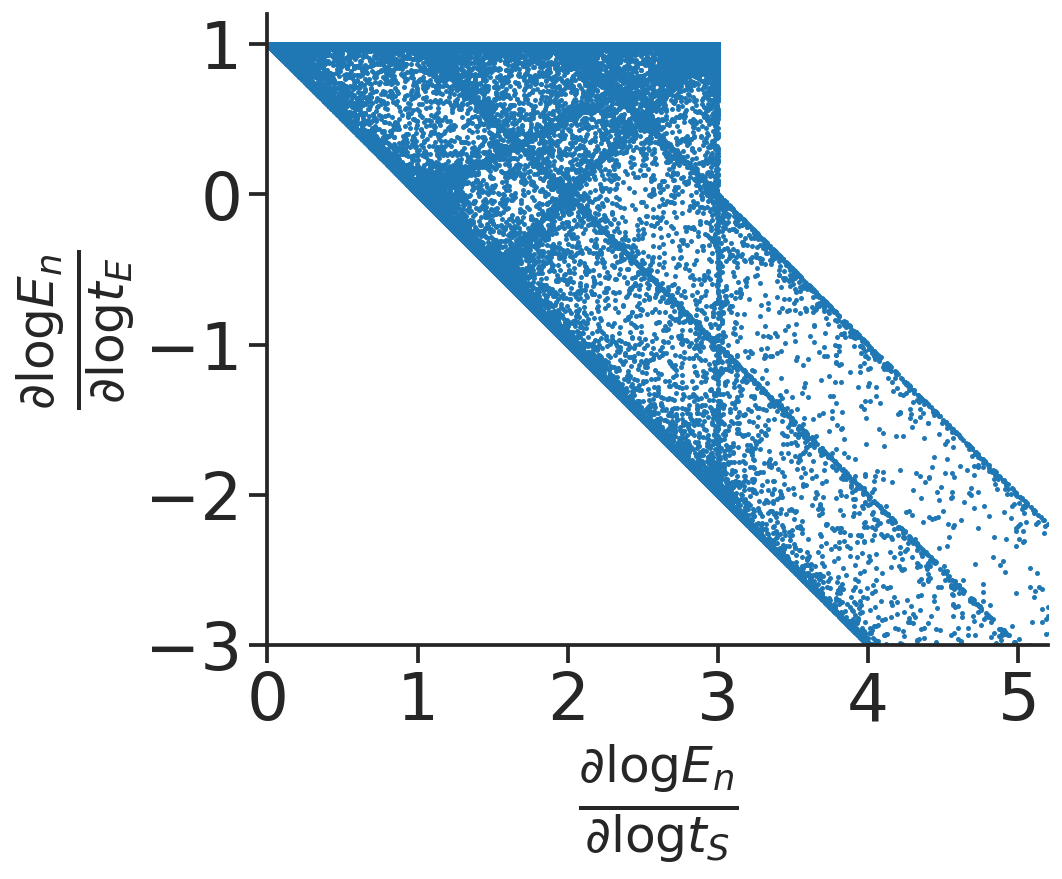

In [ ]:
sns.set_context('talk',font_scale=2,rc={'lines.linewidth':3})

fig, ax = plt.subplots(1, 1,figsize=(7,7))
ax.set_aspect('equal')
ax.scatter(logders[:,4,0],logders[:,4,1],s=1)
ax.set_xlabel(r'$\frac{\partial \log E_n}{\partial \log t_S}$')
ax.set_ylabel(r'$\frac{\partial \log E_n}{\partial \log t_E}$')

xmin=0; xmax=5.2; ax.set_xlim([xmin,xmax])
ymin=-3; ymax=1.2; ax.set_ylim([ymin,ymax])

#remove top and right borders
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#restrict number of ticks
plt.locator_params(axis='x', nbins=int(xmax-xmin)+1)
plt.locator_params(axis='y', nbins=int(ymax-ymin)+1)

handles, labels = ax.get_legend_handles_labels()
# plt.savefig('C-log-der-tE-tS-sampling.pdf', bbox_inches='tight')

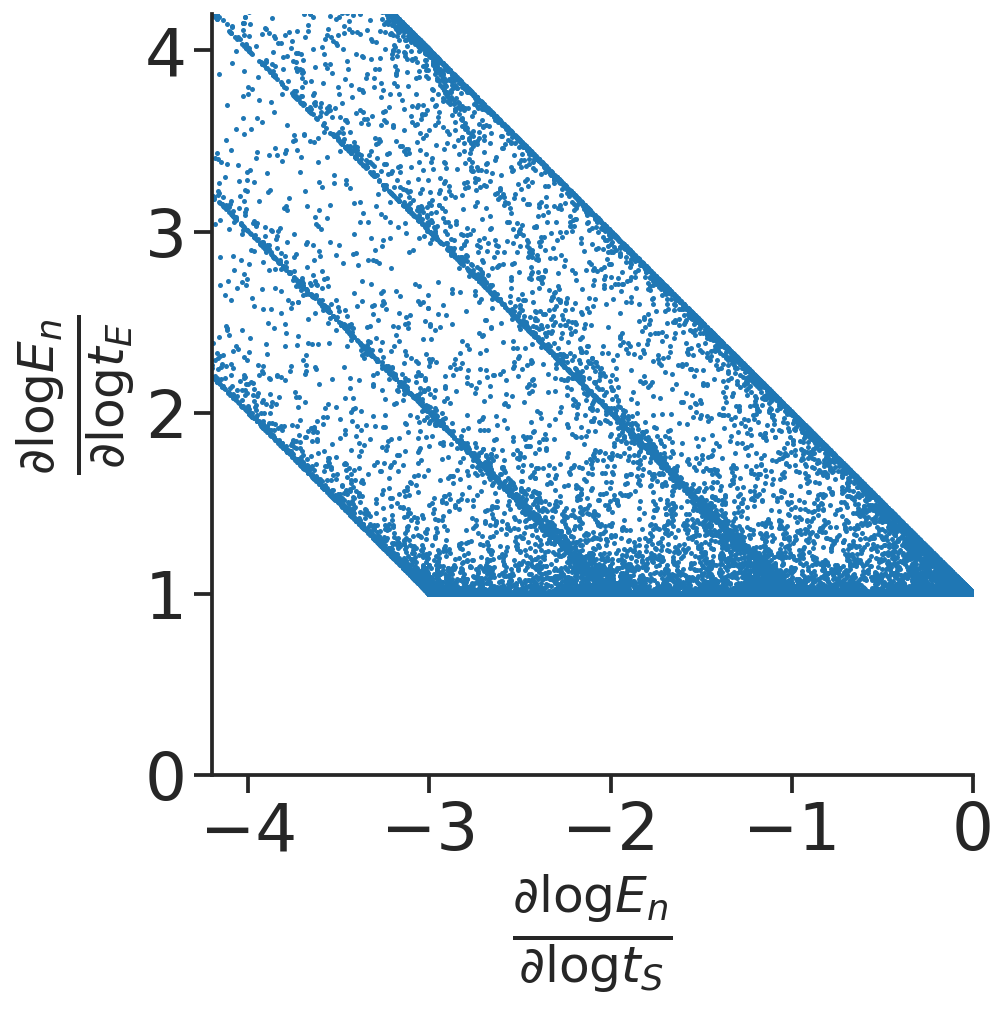

In [ ]:
sns.set_context('talk',font_scale=2,rc={'lines.linewidth':3})

fig, ax = plt.subplots(1, 1,figsize=(7,7))
ax.set_aspect('equal')
ax.scatter(logders[:,1,0],logders[:,1,1],s=1)
ax.set_xlabel(r'$\frac{\partial \log E_n}{\partial \log t_S}$')
ax.set_ylabel(r'$\frac{\partial \log E_n}{\partial \log t_E}$')

xmin=-4.2; xmax=0; ax.set_xlim([xmin,xmax])
ymin=0; ymax=4.2; ax.set_ylim([ymin,ymax])

#remove top and right borders
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#restrict number of ticks
plt.locator_params(axis='x', nbins=int(xmax-xmin)+1)
plt.locator_params(axis='y', nbins=int(ymax-ymin)+1)

handles, labels = ax.get_legend_handles_labels()
# plt.savefig('C-log-der-tE-tS-sampling.pdf', bbox_inches='tight')

(4) multisite one-by-one binding, 
\\(E_{00}+S \rightleftharpoons E_{01}\\), \\(E_{00} + S \rightleftharpoons E_{10}\\),
\\(E_{01} + S \rightleftharpoons E_{11}\\), \\(E_{11} + S \rightleftharpoons E_{11}\\).
Order species by \\((S,E_{00},E_{01},E_{10},E_{11})\\), order totals by \\((t_S,t_E)\\).
This case has \\(N = \begin{bmatrix} -1 & -1 & 1 & 0 & 0 \\ -1 & -1 & 0 & 1 & 0 \\ -1 & 0 & -1 & 0 & 1 \\ -1 & 0 & 0 & -1 & 1 \end{bmatrix}\\), 
\\(L = \begin{bmatrix} 1 & 0 & 1 & 1 & 2 \\ 0 & 1 & 1 & 1 & 1 \end{bmatrix}\\).

In [ ]:
l_mat=np.array([[1,0,1,1,2],
                [0,1,1,1,1]])
# n_mat=np.array([[-1,-1,1,0,0],
#                 [-1,-1,0,1,0],
#                 [-1,0,-1,0,1],
#                 [-1,0,0,-1,1]])

n_mat=np.array([[-1,-1,1,0,0],
                [-1,-1,0,1,0],
                [-1,0,0,-1,1]])

d_dim,n_dim=l_mat.shape

n_pts=100000
x_min_log10=-6
x_max_log10=6
xx=10**(np.random.rand(n_pts,n_dim)*(x_max_log10 - x_min_log10)+x_min_log10)
logders=np.zeros([n_pts,n_dim,n_dim])
for i in range(n_pts):
  logders[i]=log_der_calc(xx[i],l_mat,n_mat)

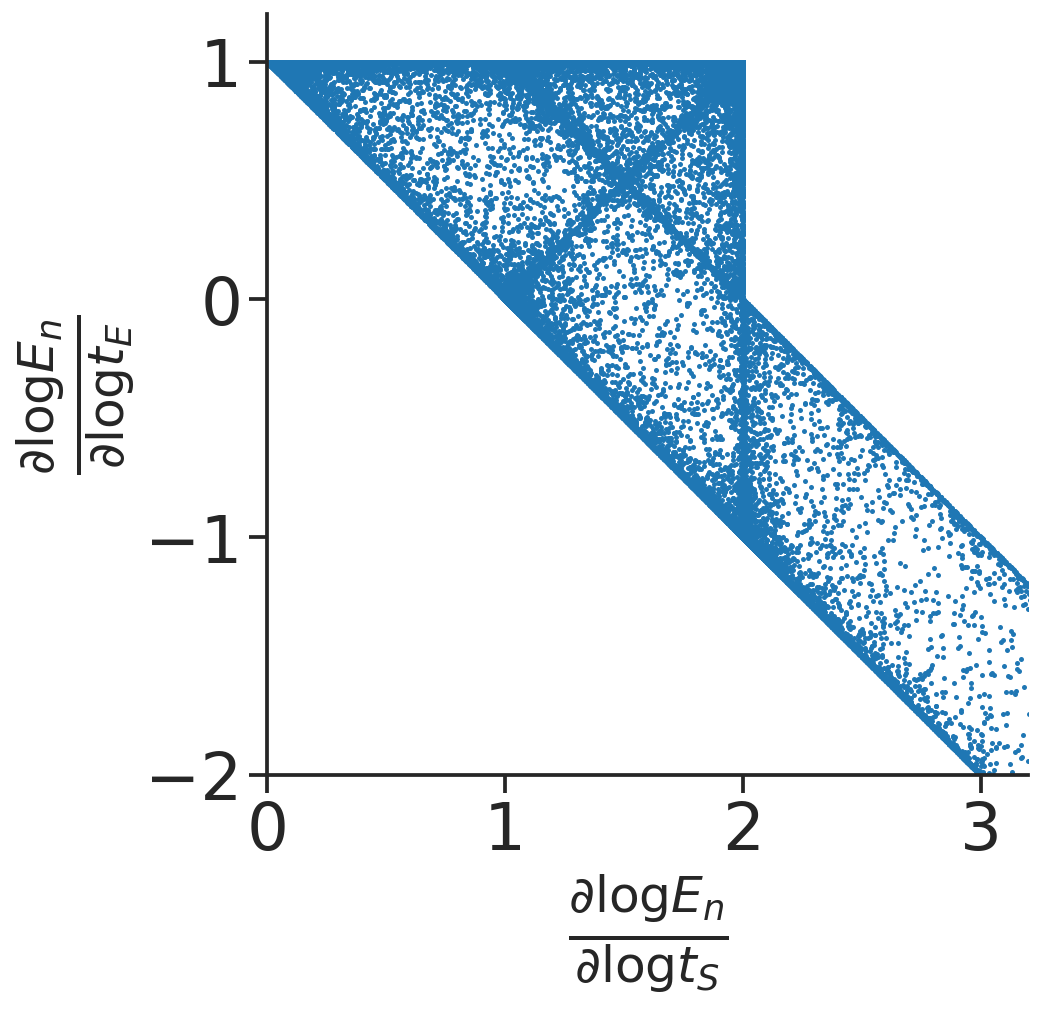

In [ ]:
sns.set_context('talk',font_scale=2,rc={'lines.linewidth':3})

fig, ax = plt.subplots(1, 1,figsize=(7,7))
ax.set_aspect('equal')
ax.scatter(logders[:,4,0],logders[:,4,1],s=1)
ax.set_xlabel(r'$\frac{\partial \log E_n}{\partial \log t_S}$')
ax.set_ylabel(r'$\frac{\partial \log E_n}{\partial \log t_E}$')

xmin=0; xmax=3.2; ax.set_xlim([xmin,xmax])
ymin=-2; ymax=1.2; ax.set_ylim([ymin,ymax])

#remove top and right borders
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#restrict number of ticks
plt.locator_params(axis='x', nbins=int(xmax-xmin)+1)
plt.locator_params(axis='y', nbins=int(ymax-ymin)+1)

handles, labels = ax.get_legend_handles_labels()
# plt.savefig('C-log-der-tE-tS-sampling.pdf', bbox_inches='tight')

Phosphorylation. \\(X_p + Y \rightleftharpoons C \rightleftharpoons X + Y_p\\).
Order species by \\((X,X_p,Y,Y_p,C)\\). Order totals by \\(t_X,t_Y,t_p\\). We have 
\\(N = \begin{bmatrix} -1 & 0 & 0 & -1 & 1 \\ 0 & -1 & -1 & 0 & 1 \end{bmatrix}\\).
\\(L = \begin{bmatrix} 1 & 1 & 0 & 0 & 1 \\ 0 & 0 & 1 & 1 & 1 \\ 0 & 1 & 0 & 1 & 1 \end{bmatrix}\\).

In [ ]:
l_mat=np.array([[1,1,0,0,1],
                [0,0,1,1,1],
                [0,1,0,1,1]])
n_mat=np.array([[-1,0,0,-1,1],
                [0,-1,-1,0,1]])

d_dim,n_dim=l_mat.shape

n_pts=100000
x_min_log10=-8
x_max_log10=8
xx=10**(np.random.rand(n_pts,n_dim)*(x_max_log10 - x_min_log10)+x_min_log10)
logders=np.zeros([n_pts,n_dim,n_dim])
for i in range(n_pts):
  logders[i]=log_der_calc(xx[i],l_mat,n_mat)

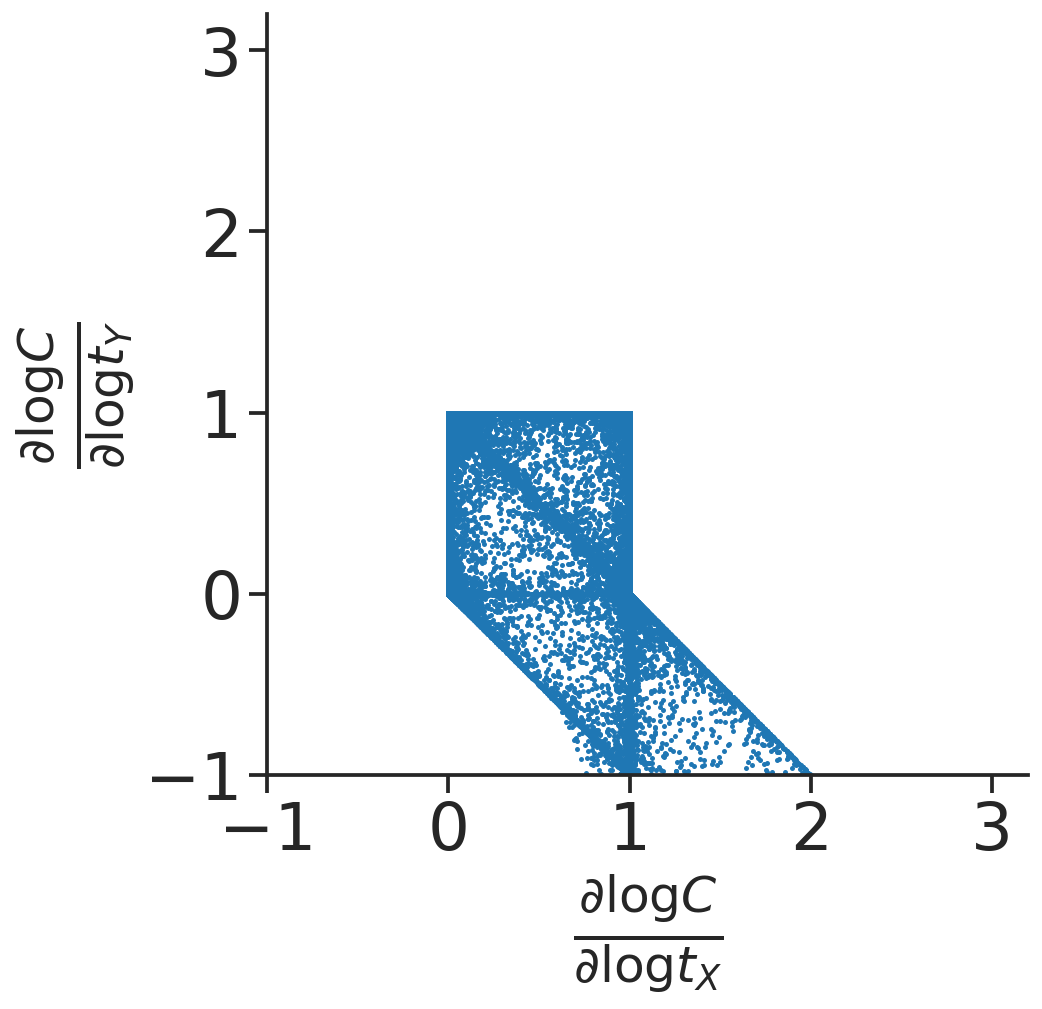

In [ ]:
sns.set_context('talk',font_scale=2,rc={'lines.linewidth':3})

fig, ax = plt.subplots(1, 1,figsize=(7,7))
ax.set_aspect('equal')
ax.scatter(logders[:,4,0],logders[:,4,2],s=1)
ax.set_xlabel(r'$\frac{\partial \log C}{\partial \log t_X}$')
ax.set_ylabel(r'$\frac{\partial \log C}{\partial \log t_Y}$')

xmin=-1; xmax=3.2; ax.set_xlim([xmin,xmax])
ymin=-1; ymax=3.2; ax.set_ylim([ymin,ymax])

#remove top and right borders
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#restrict number of ticks
plt.locator_params(axis='x', nbins=int(xmax-xmin)+1)
plt.locator_params(axis='y', nbins=int(ymax-ymin)+1)

handles, labels = ax.get_legend_handles_labels()
# plt.savefig('C-log-der-tE-tS-sampling.pdf', bbox_inches='tight')

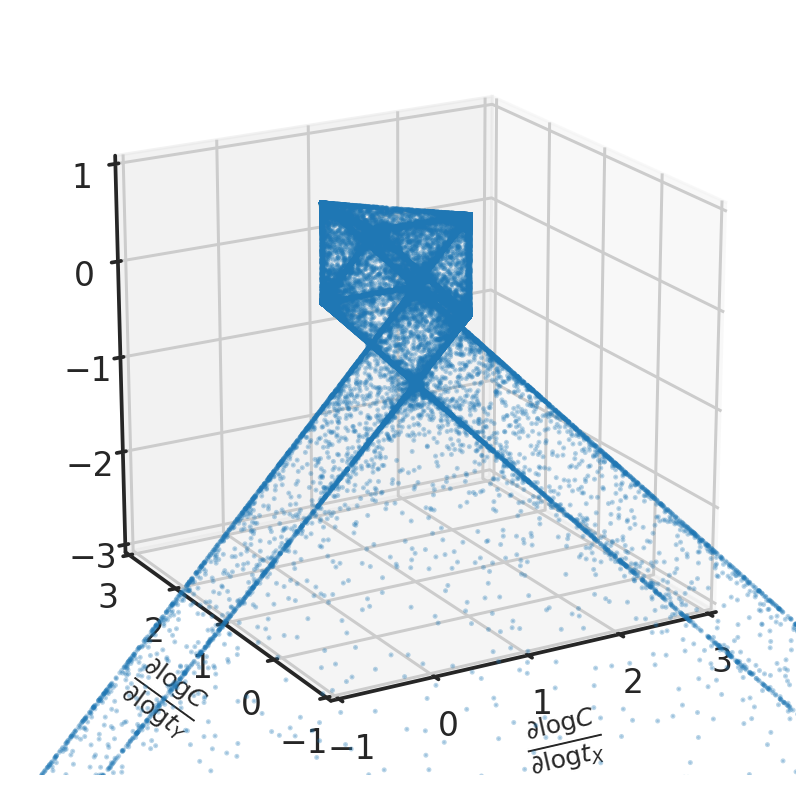

In [ ]:
sns.set_context('talk',font_scale=1,rc={'lines.linewidth':3})

fig, ax = plt.subplots(1, 1,figsize=(7,7))
ax.set_aspect('equal')
ax = plt.axes(projection='3d')
ax.scatter(logders[:,4,0],logders[:,4,1],logders[:,4,2],s=1,alpha=0.3)
ax.set_xlabel(r'$\frac{\partial \log C}{\partial \log t_X}$')
ax.set_ylabel(r'$\frac{\partial \log C}{\partial \log t_Y}$')

xmin=-1; xmax=3; ax.set_xlim([xmin,xmax])
ymin=-1; ymax=3; ax.set_ylim([ymin,ymax])
zmin=-3; zmax=1; ax.set_zlim([zmin,zmax])

#remove top and right borders
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#restrict number of ticks
plt.locator_params(axis='x', nbins=int(xmax-xmin)+1)
plt.locator_params(axis='y', nbins=int(ymax-ymin)+1)
plt.locator_params(axis='z', nbins=int(zmax-zmin)+1)

handles, labels = ax.get_legend_handles_labels()
# plt.savefig('C-log-der-tE-tS-sampling.pdf', bbox_inches='tight')


ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
ax.zaxis.labelpad = 10
ax.view_init(20, -120)



One-by-one binding of two different substrates.
\\(E_0+S_1 \rightleftharpoons E_1\\), \\(E_1 + S_2 \rightleftharpoons E_2 \\).
Order species by \\((S_1,S_2,E_0,E_1,E_2)\\), order totals by \\((t_{S1},t_{S2},t_E)\\). 
\\(N = \begin{bmatrix} -1 & 0 & -1 & 1 & 0 \\ 0 & -1 & 0 & -1 & 1  \end{bmatrix}\\), 
\\(L = \begin{bmatrix} 1 & 0 & 0 & 1 & 1 \\ 0 & 1 & 0 &  0 & 1 \\ 0 & 0 & 1 & 1 & 1 \end{bmatrix}\\).

In [ ]:
l_mat=np.array([[1,0,0,1,1],
                [0,1,0,0,1],
                [0,0,1,1,1]])
n_mat=np.array([[-1,0,-1,1,0],
                [0,-1,0,-1,1]])

d_dim,n_dim=l_mat.shape

n_pts=100000
x_min_log10=-8
x_max_log10=8
xx=10**(np.random.rand(n_pts,n_dim)*(x_max_log10 - x_min_log10)+x_min_log10)
logders=np.zeros([n_pts,n_dim,n_dim])
for i in range(n_pts):
  logders[i]=log_der_calc(xx[i],l_mat,n_mat)

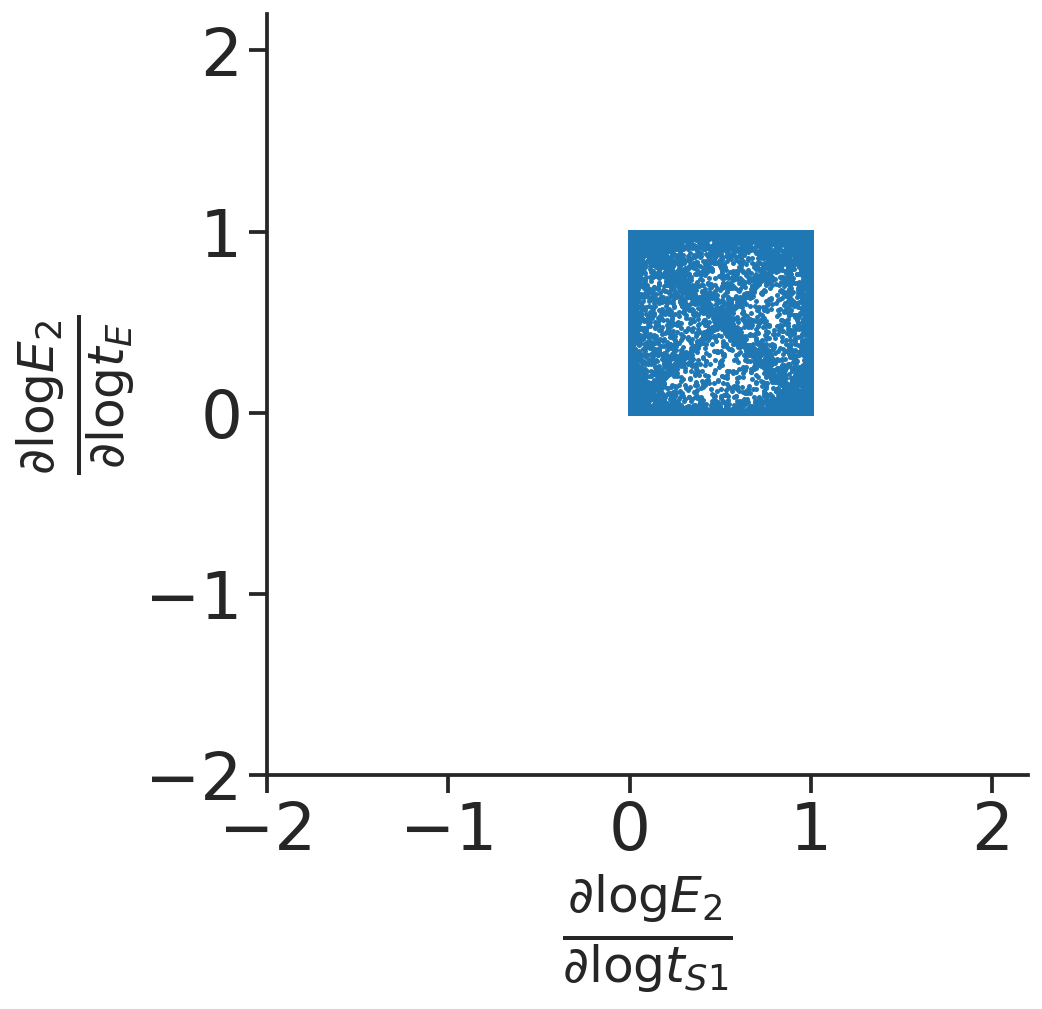

In [ ]:
sns.set_context('talk',font_scale=2,rc={'lines.linewidth':3})

fig, ax = plt.subplots(1, 1,figsize=(7,7))
ax.set_aspect('equal')
ax.scatter(logders[:,4,0],logders[:,4,1],s=1)
ax.set_xlabel(r'$\frac{\partial \log E_2}{\partial \log t_{S1}}$')
ax.set_ylabel(r'$\frac{\partial \log E_2}{\partial \log t_E}$')

xmin=-2; xmax=2.2; ax.set_xlim([xmin,xmax])
ymin=-2; ymax=2.2; ax.set_ylim([ymin,ymax])

#remove top and right borders
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#restrict number of ticks
plt.locator_params(axis='x', nbins=int(xmax-xmin)+1)
plt.locator_params(axis='y', nbins=int(ymax-ymin)+1)

handles, labels = ax.get_legend_handles_labels()
# plt.savefig('C-log-der-tE-tS-sampling.pdf', bbox_inches='tight')

In [ ]:
sns.set_context('talk',font_scale=2,rc={'lines.linewidth':3})

fig, ax = plt.subplots(1, 1,figsize=(7,7))
ax.set_aspect('equal')
ax.scatter(logders[:,4,0],logders[:,4,2],s=1)
ax.set_xlabel(r'$\frac{\partial \log E_2}{\partial \log t_{S1}}$')
ax.set_ylabel(r'$\frac{\partial \log E_2}{\partial \log t_E}$')

xmin=-2; xmax=2.2; ax.set_xlim([xmin,xmax])
ymin=-1; ymax=3.2; ax.set_ylim([ymin,ymax])

#remove top and right borders
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#restrict number of ticks
plt.locator_params(axis='x', nbins=int(xmax-xmin)+1)
plt.locator_params(axis='y', nbins=int(ymax-ymin)+1)

handles, labels = ax.get_legend_handles_labels()
# plt.savefig('C-log-der-tE-tS-sampling.pdf', bbox_inches='tight')

### Ron's circuit, A2. Order of species, \\(A,B,A_2,B_2,C_{AB}\\).

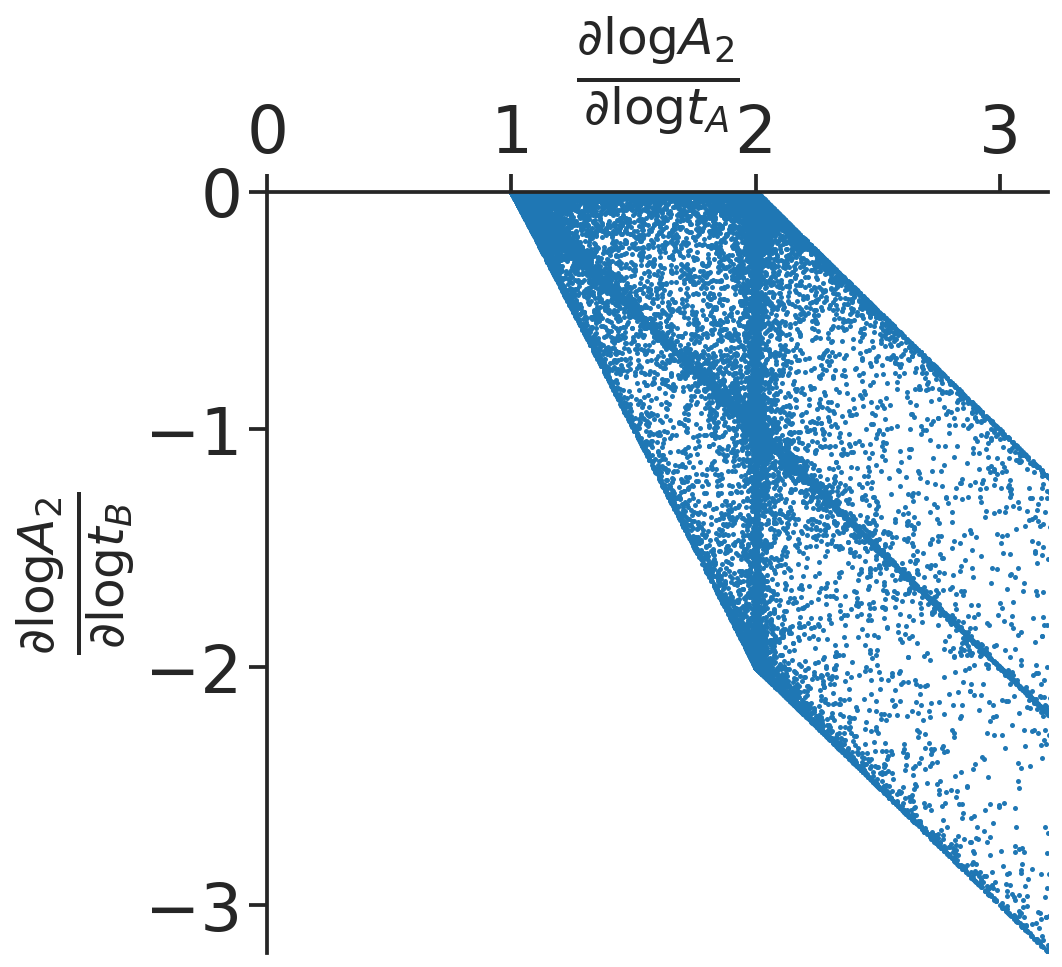

In [ ]:
l_mat=np.array([[1,0,2,0,1],
                [0,1,0,2,1]])
n_mat=np.array([[-2,0,1,0,0],
                [0,-2,0,1,0],
                [-1,-1,0,0,1]])
d_dim,n_dim=l_mat.shape

n_pts=100000
x_min_log10=-6
x_max_log10=6
xx=10**(np.random.rand(n_pts,n_dim)*(x_max_log10 - x_min_log10)+x_min_log10)
logders=np.zeros([n_pts,n_dim,n_dim])

for i in range(n_pts):
  logders[i]=log_der_calc(xx[i],l_mat,n_mat)

sns.set_context('talk',font_scale=2,rc={'lines.linewidth':3})

fig, ax = plt.subplots(1, 1,figsize=(7,7))
species_idx=2
ax.scatter(logders[:,species_idx,0],logders[:,species_idx,1],s=1)
ax.set_xlabel(r'$\frac{\partial \log A_2}{\partial \log t_A}$')
ax.set_ylabel(r'$\frac{\partial \log A_2}{\partial \log t_B}$')

#remove top and right borders
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#restrict number of ticks
plt.locator_params(axis='x', nbins=4)
plt.locator_params(axis='y', nbins=4)

ax.set_xlim([0,3.2])
ax.set_ylim([-3.2,0])

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top') 
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

handles, labels = ax.get_legend_handles_labels()
# plt.savefig('C-log-der-tE-tS-sampling.pdf', bbox_inches='tight')